# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [10]:
app_train['AMT_INCOME_TOTAL_GRP'] = pd.qcut(app_train['AMT_INCOME_TOTAL']/1000,10)
app_train['AMT_INCOME_TOTAL_GRP'].value_counts().sort_index()
app_train['AMT_INCOME_TOTAL_TEST'] = app_train['AMT_INCOME_TOTAL']/1000
app_train['AMT_INCOME_TOTAL_TEST'].head()

0    202.5
1    270.0
2     67.5
3    135.0
4    121.5
Name: AMT_INCOME_TOTAL_TEST, dtype: float64

[Interval(25.648999999999997, 81.0, closed='right')
 Interval(81.0, 99.0, closed='right')
 Interval(99.0, 112.5, closed='right')
 Interval(112.5, 135.0, closed='right')
 Interval(135.0, 147.15, closed='right')
 Interval(147.15, 162.0, closed='right')
 Interval(162.0, 180.0, closed='right')
 Interval(180.0, 225.0, closed='right')
 Interval(225.0, 270.0, closed='right')
 Interval(270.0, 117000.0, closed='right')]


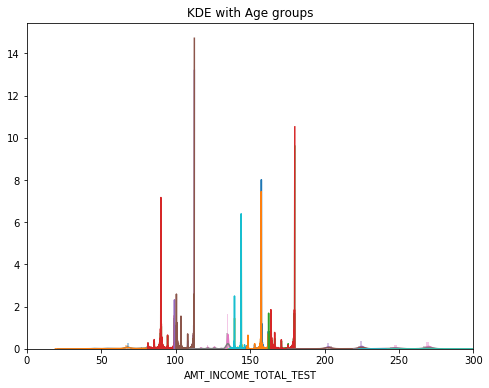

In [12]:
amt_group_sorted = np.sort(app_train['AMT_INCOME_TOTAL_GRP'].unique())
print(amt_group_sorted)
plt.figure(figsize=(8,6))
for i in range(len(amt_group_sorted)):
    sns.distplot(app_train.loc[(app_train['AMT_INCOME_TOTAL_GRP'] == amt_group_sorted[i]) & \
                              (app_train['TARGET'] == 0), 'AMT_INCOME_TOTAL_TEST'], label = str(amt_group_sorted[i]))
    
    sns.distplot(app_train.loc[(app_train['AMT_INCOME_TOTAL_GRP'] == amt_group_sorted[i]) & \
                              (app_train['TARGET'] == 1), 'AMT_INCOME_TOTAL_TEST'], label = str(amt_group_sorted[i]))
plt.title('KDE with Age groups')
plt.xlim([0,300])
plt.show()

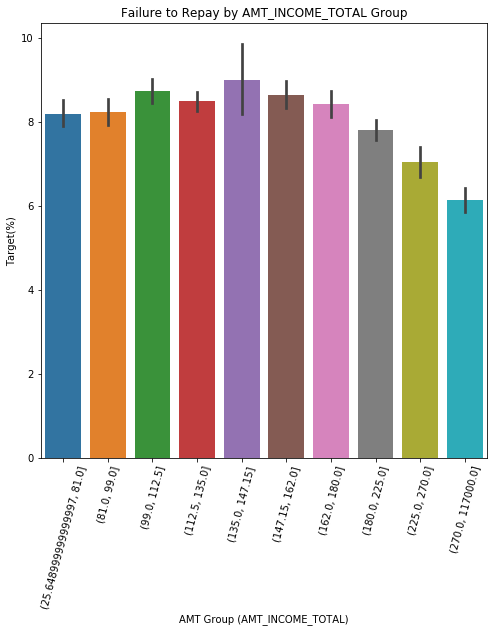

In [7]:
plt.figure(figsize = (8, 8))

# 以DAYS_EMPLOYED分組為 x, target 為 y 繪製 barplot


px = app_train["AMT_INCOME_TOTAL_GRP"]
py = 100 * app_train["TARGET"]
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('AMT Group (AMT_INCOME_TOTAL)'); plt.ylabel('Target(%)')
plt.title('Failure to Repay by AMT_INCOME_TOTAL Group');